# ６章 音声データの加工・可視化１０本ノック



## ノック７１：音データを再生してみよう

In [13]:
import IPython.display as disp
disp.Audio('data/音声.mp3')

In [14]:
disp.Audio('data/携帯電話着信音.mp3')

## ノック７２：音データを読み込んでみよう

In [15]:
import librosa
audio1, sr1 = librosa.load('data/音声.mp3', sr=None)
print(audio1)
print(sr1)

[ 0.          0.          0.         ... -0.00418601 -0.00416326
 -0.00401785]
44100


音の数字データと周波数が表示される

In [16]:
print(audio1.shape)
print(audio1.max())
print(audio1.min())

(46080,)
0.71468115
-0.5591311


数字データ数（サンプリング数）と、最大、最低の振幅値が表示される

In [17]:
audio2, sr2 = librosa.load('data/携帯電話着信音.mp3', sr=None)
print(audio2)
print(sr2)
print(audio2.shape)

[ 0.          0.          0.         ... -0.00509245 -0.00407731
 -0.00323255]
44100
(101376,)


## ノック７３：音データの一部を取得してみよう

In [18]:
# 2秒のデータを1秒に変換
audio2, sr2 = librosa.load('data/携帯電話着信音.mp3',sr=None, offset=0, duration=1)
print(audio2)
print(sr2)
print(audio2.shape)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.8994158e-05 7.2300778e-04
 1.7945722e-03]
44100
(44100,)


In [19]:
disp.Audio(data=audio2, rate=sr2)

In [20]:
# 音声データもきっかり1秒間に変更
audio1, sr1 = librosa.load('data/音声.mp3',sr=None, offset=0, duration=1)
disp.Audio(data=audio1, rate=sr1)
print(audio1.shape)

(44100,)


## ノック７４：音データのサンプリングレートを変えてみよう

In [21]:
# 22050Hz sampling rate でのデータ読み込み
audio1_sr22, sr1_sr22 = librosa.load('data/音声.mp3',sr=22050, offset=0, duration=1)
print(audio1_sr22)
print(sr1_sr22)
print(audio1_sr22.shape)

[-2.2204460e-16 -3.7192471e-15  1.0214052e-14 ...  2.2931159e-03
  1.9602899e-03  2.4683480e-03]
22050
(22050,)


In [22]:
# 8000Hz sampling rate でのデータ作成
audio1_sr8 = librosa.resample(audio1, orig_sr=sr1, target_sr=8000)
print(audio1_sr8)
print(audio1_sr8.shape)

[-3.5944404e-11  5.8126880e-12 -9.4994686e-11 ...  2.2176565e-03
  2.0332159e-03  2.3386334e-03]
(8000,)


In [ ]:
# 参考に、サンプリングレートのみを取得する場合は以下のメソッドが有効
librosa.get_samplerate('data/音声.mp3')

44100

## ノック７５：音データを可視化してみよう

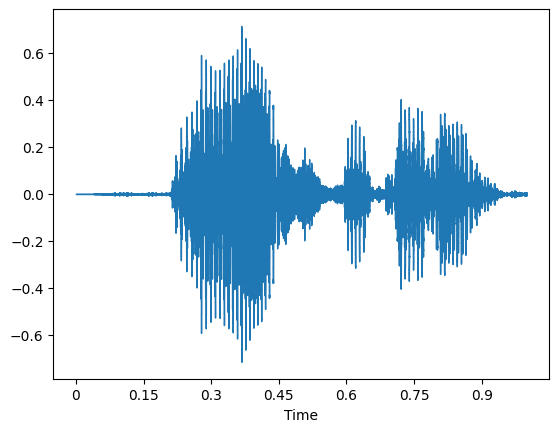

In [ ]:
# オリジナルの波形データ
import librosa.display as libdisp
libdisp.waveshow(audio1, sr=sr1)

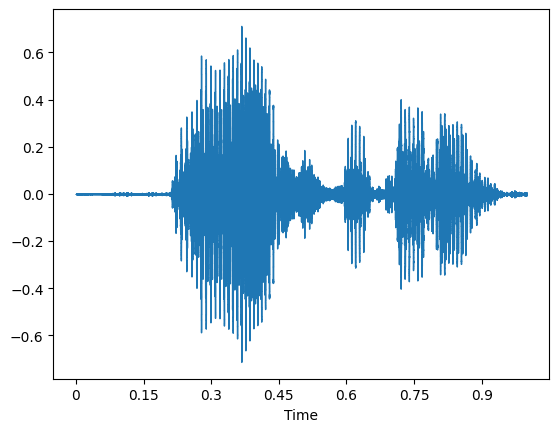

In [ ]:
# 22050Hz データ
libdisp.waveshow(audio1_sr22, sr=sr1_sr22)

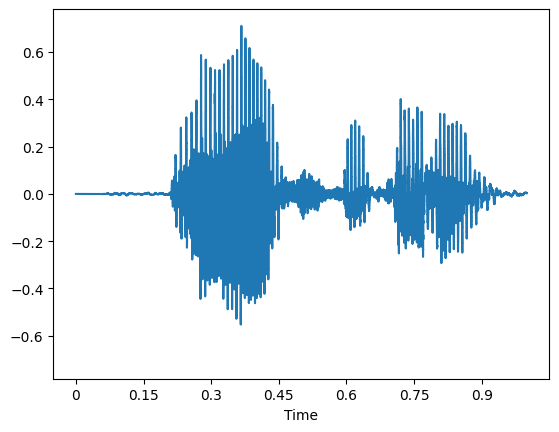

In [ ]:
# 8000Hz データ
libdisp.waveshow(audio1_sr8, sr=8000)

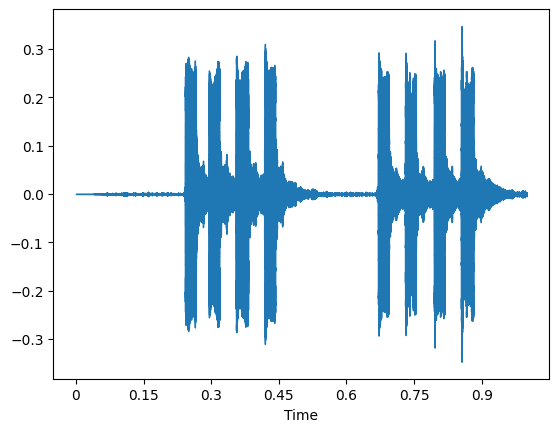

In [30]:
# 携帯電話の着信
libdisp.waveshow(audio2, sr=sr2)

## ノック７６：音データの大きさを取得してみよう

In [ ]:
# RMS (二乗平均平方根) を確認。振幅は +1 ~ -1 の範囲のため。
import numpy as np
audio1_rms = np.sqrt(np.mean(audio1**2))
audio2_rms = np.sqrt(np.mean(audio2**2))
print(audio1_rms)
print(audio2_rms)

0.117136106
0.07960443


RMSは audio1 の方が大きいため、全体平均的な音量は audio1 > audio2 と分かる

In [ ]:
# 時間軸で区切って RMS を算出する
rms1 = librosa.feature.rms(y=audio1)
time1 = librosa.times_like(rms1, sr=sr1)
print(rms1.shape)
rms1

(1, 87)


array([[0.00000000e+00, 0.00000000e+00, 3.26023041e-06, 6.15759127e-05,
        3.26528039e-04, 9.28180583e-04, 1.43364549e-03, 2.11794162e-03,
        2.83022108e-03, 2.95363134e-03, 2.78255367e-03, 2.47683562e-03,
        2.14898819e-03, 2.37140572e-03, 2.54095322e-03, 2.70694494e-03,
        2.72329897e-03, 1.75013021e-02, 4.15570773e-02, 6.69912845e-02,
        8.92795622e-02, 1.18809819e-01, 1.51561230e-01, 1.74796283e-01,
        1.94208369e-01, 2.03803346e-01, 2.03455791e-01, 2.08877102e-01,
        2.23944947e-01, 2.33912215e-01, 2.52728432e-01, 2.57646561e-01,
        2.62712061e-01, 2.63533294e-01, 2.47948259e-01, 2.44444311e-01,
        2.12403521e-01, 1.78452983e-01, 1.47364497e-01, 9.61780176e-02,
        6.73961416e-02, 5.44461161e-02, 5.00178114e-02, 4.58628945e-02,
        4.36514057e-02, 4.05725278e-02, 3.09379026e-02, 2.19069142e-02,
        1.59058906e-02, 1.20766889e-02, 4.20555100e-02, 6.77456483e-02,
        8.71006921e-02, 1.05747320e-01, 1.02373555e-01, 8.810358

区切り範囲は一般的に 2048Hz と 512Hz が使われる。\
今回は 44100 / 512 ≒ 86 -> 87 となった。

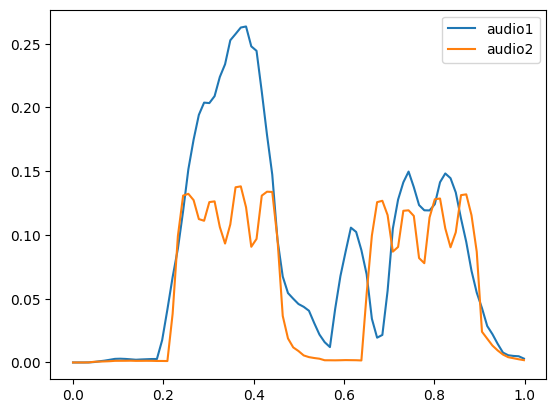

In [ ]:
# 加工後の音声を比較
import matplotlib.pyplot as plt

rms2 = librosa.feature.rms(y=audio2)
time2 = librosa.times_like(rms2, sr=sr2)
plt.plot(time1, rms1[0], label='audio1')
plt.plot(time2, rms2[0], label='audio2')
plt.legend()

## ノック７７：周波数スペクトルを表示してみよう

In [ ]:
# フーリエ変換
fft = np.fft.fft(audio1)

# FFTの結果である fft 配列の要素数を取得し、変数 n に格納
n = fft.size

# fft 配列の各要素の絶対値（複素数の大きさ）を計算 -> 縦軸となる振幅スペクトルを取得。これを二乗するとパワースペクトルと呼ぶ。
## FFTの結果は複素数で表され、その絶対値は各周波数成分の振幅（強さ）を示される
## 計算された振幅の配列が amp 変数に格納
amp = np.abs(fft)

# FFTの結果に対応する周波数軸を生成。
## n はFFTのサンプル数（つまり、元のオーディオデータのサンプル数）です。
## d はサンプリング間隔です。sr1 はサンプリングレート（1秒あたりのサンプル数）を表しているので、1 / sr1 は1サンプルあたりの時間間隔（秒）になります。
## np.fft.fftfreq() 関数は、これらの情報に基づいて、FFTの結果の各要素がどの周波数に対応するかを示す配列を生成し、freq 変数に格納します。生成される周波数は、負の周波数と正の周波数を含みます。
freq = np.fft.fftfreq(n, d=1/sr1)

print(amp.shape)
print(freq.shape)
print(amp.max())
print(amp.min())
print(freq.max())
print(freq.min())

(44100,)
(44100,)
479.54236
7.832667e-05
22049.0
-22050.0


Text(0, 0.5, 'Amplitude')

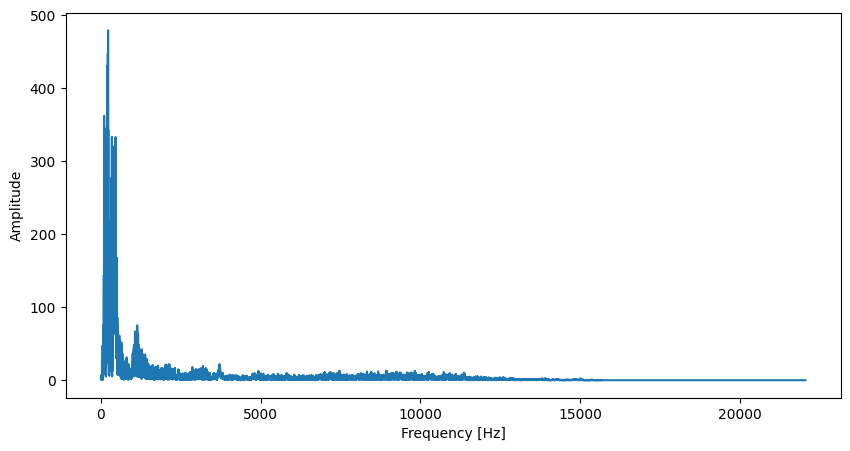

In [ ]:
# 振幅スペクトルの可視化
plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2]) # 標本化定理のため、半分の値を使用
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

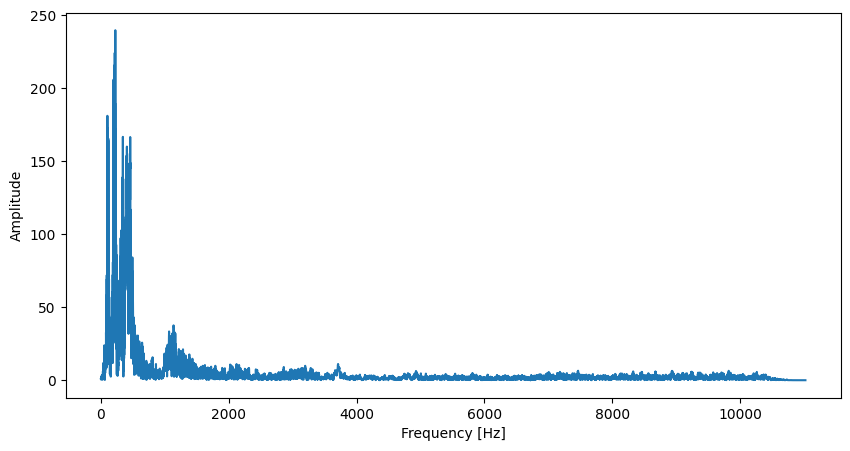

In [ ]:
# 22050Hz で同様に可視化
fft = np.fft.fft(audio1_sr22)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1/sr1_sr22)
plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

男性の声なので、低い周波数に集中している

Text(0, 0.5, 'Amplitude')

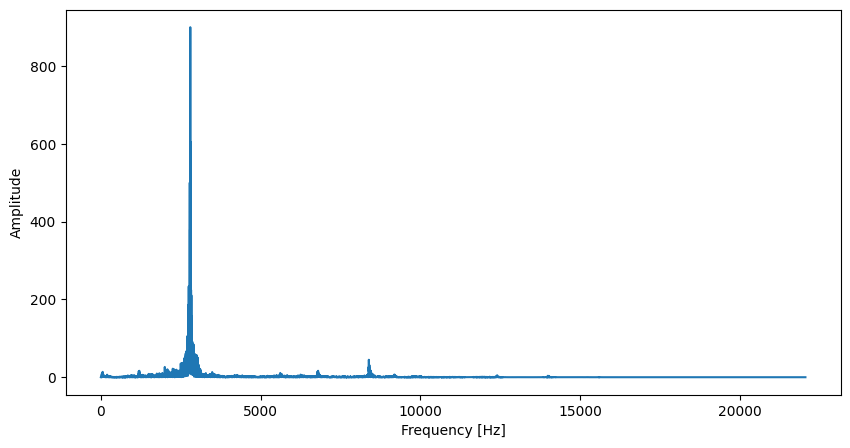

In [37]:
# 電話の着信音も可視化
fft = np.fft.fft(audio2)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1/sr2)

plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

単調な人工音なので、特定の周波数に偏っている

## ノック７８：スペクトログラムを可視化してみよう

In [ ]:
# 範囲を短時間に区切ってフーリエ変換。同様に 2048Hz & 512Hz ベース。
stft = librosa.stft(audio1)
amps = np.abs(stft)
spectrogram = librosa.amplitude_to_db(amps)
print(stft.shape)
print(amps.shape)
print(spectrogram.shape)

(1025, 87)
(1025, 87)
(1025, 87)


In [39]:
1+(2048/2)

1025.0

Text(0, 0.5, 'db')

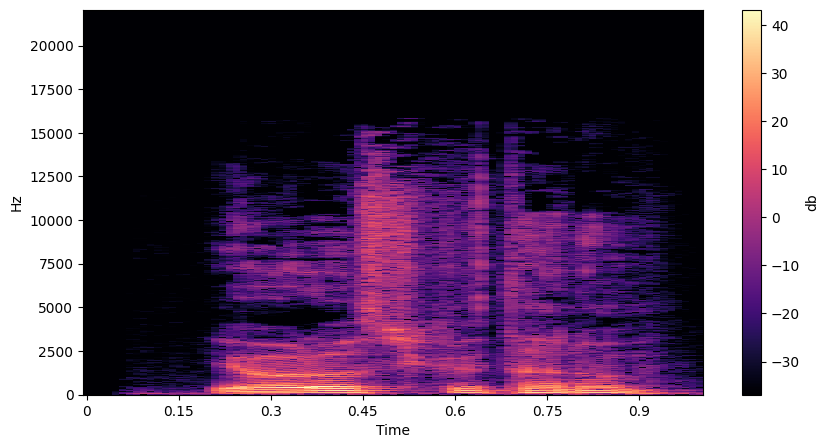

In [ ]:
# スペクトログラムを可視化
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, sr=sr1, x_axis='time', y_axis='hz',cmap='magma')
bar = plt.colorbar()
bar.ax.set_ylabel('db')

Text(0, 0.5, 'db')

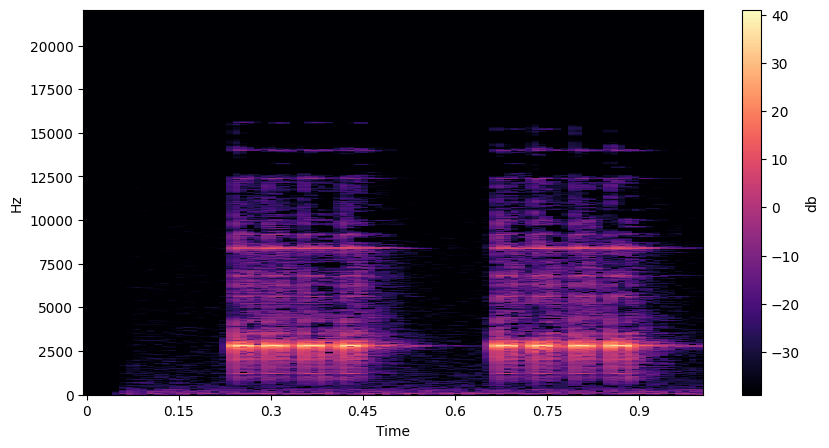

In [ ]:
# 電話着信音も可視化
plt.figure(figsize=(10, 5))
stft = librosa.stft(audio2)
amps = np.abs(stft)
spectrogram = librosa.amplitude_to_db(amps)
librosa.display.specshow(spectrogram, sr=sr2, x_axis='time', y_axis='hz',cmap='magma')
bar = plt.colorbar()
bar.ax.set_ylabel('db')

## ノック７９：音の高さや長さを変えてみよう

In [42]:
audio1, sr1 = librosa.load('data/音声.mp3',sr=None)
print(audio1.shape)
disp.Audio(data=audio1, rate=sr1)

(46080,)


In [ ]:
# 高い音へ変換
audio1_pitch = librosa.effects.pitch_shift(audio1, sr=sr1, n_steps=10)
print(audio1_pitch.shape)
disp.Audio(data=audio1_pitch, rate=sr1)

(46080,)


In [45]:
# 低い音へ変換
audio1_pitch = librosa.effects.pitch_shift(audio1, sr=sr1, n_steps=-5)
disp.Audio(data=audio1_pitch, rate=sr1)

In [46]:
audio2, sr2 = librosa.load('data/携帯電話着信音.mp3', sr=None)
print(audio2.shape)
disp.Audio(data=audio2, rate=sr2)

(101376,)


In [48]:
# 音を伸ばす
audio2_time = librosa.effects.time_stretch(audio2, rate=0.5)
print(audio2_time.shape)
disp.Audio(data=audio2_time, rate=sr2)

(202752,)


In [50]:
# 音を圧縮する
audio2_time = librosa.effects.time_stretch(audio2, rate=2)
print(audio2_time.shape)
disp.Audio(data=audio2_time, rate=sr2)

(50688,)


## ノック８０：音データを保存しよう

In [51]:
import soundfile as sf

sr = 44100
sf.write('data/audio2_time.wav', audio2_time, sr)

In [52]:
audio_read, sr_read = librosa.load('data/audio2_time.wav', sr=None)
print(audio_read.shape)
print(sr_read)
disp.Audio(data=audio_read, rate=sr_read)

(50688,)
44100
